In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# URL страницы
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

# Чтение всех таблиц со страницы
tables = pd.read_html(url)
table= tables[12]
print(table.head())


             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [4]:
num_rows, num_cols = table.shape
print(f"\nКоличество строк: {num_rows}")
print(f"Количество столбцов: {num_cols}")


Количество строк: 28
Количество столбцов: 9


In [5]:
table.replace("—", np.nan, inplace=True)


In [6]:
column_types = table.dtypes
print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [7]:
regions = table['Регіон']
for column in table.columns:
        table[column] = pd.to_numeric(table[column], errors='coerce')
table['Регіон'] = regions
column_types = table.dtypes
print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [8]:
missing_counts = table.isnull().sum()
missing = (missing_counts / len(table)) * 100

print(missing)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [9]:
df = table.drop(table.index[-1])
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

             Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0              Крим  230.0  206.0  160.0   130    73   126  111.44   80.173913
1         Вінницька  224.0  192.0  142.0   124    84   112  109.00   76.000000
2         Волинська  247.0  250.0  179.0   153   112   148  141.00  101.000000
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.00   71.000000
4          Донецька  271.0  214.0  140.0   109    61    98   82.00   80.173913


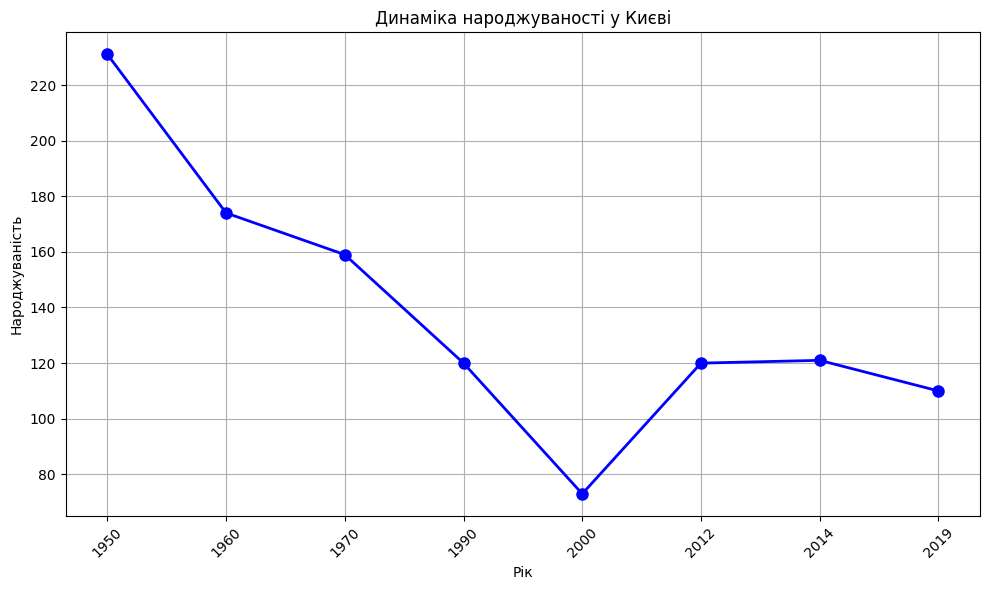

In [10]:
columns_to_fill = df.columns[df.columns != 'Регіон']

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())
print(df.head())

kyiv_data = df[df['Регіон'] == 'Київ'].squeeze()

# Визначення років для відображення на графіку
years = kyiv_data.index[1:]

# Визначення значень для лінійного графіка
values = kyiv_data.values[1:]

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Налаштування заголовка та підписів осей
plt.title('Динаміка народжуваності у Києві')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Показати графік
plt.show()


Волинська
Закарпатська
Івано-Франківська
Львівська
Одеська
Рівненська
Херсонська
Чернівецька
Київ


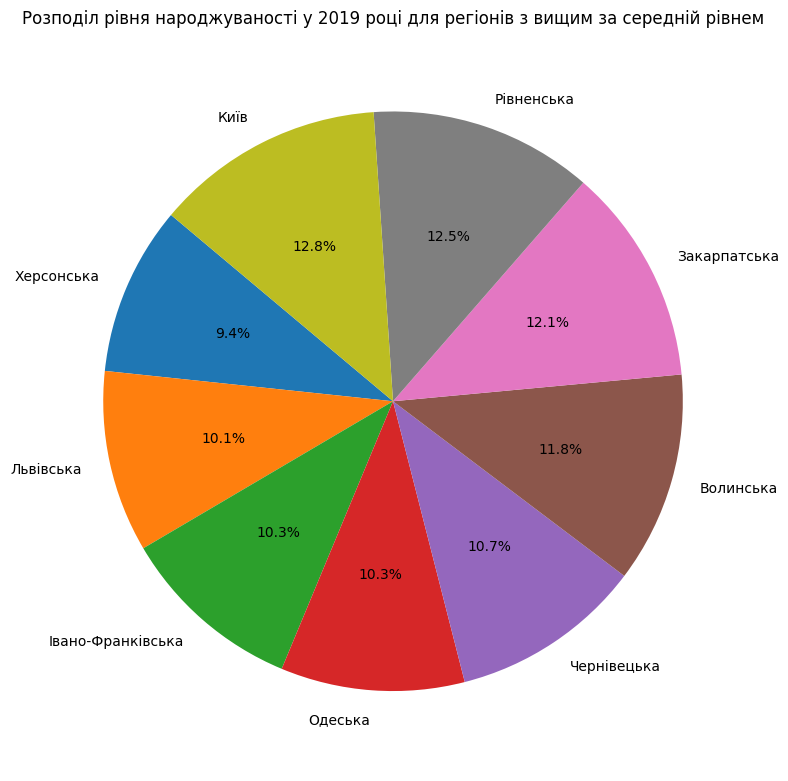

In [19]:
rate_2019 = df['2019'].mean()
regions_above_average = df[df['2019'] > rate_2019]['Регіон'].tolist()
for region in regions_above_average:
    print(region)

# Відбір регіонів, де рівень народжуваності у 2019 році вищий за середній
regions_above_average = df[df['2019'] > rate_2019]

regions_above_average = regions_above_average.sort_values(by='2019')

# Побудова кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(regions_above_average['2019'], labels=regions_above_average['Регіон'], autopct='%1.1f%%', startangle=140)
plt.title('Розподіл рівня народжуваності у 2019 році для регіонів з вищим за середній рівнем')
plt.axis('equal')  # Забезпечує круглу форму діаграми
plt.tight_layout()
plt.show()

In [12]:
region_highest= df.loc[df['2014'].idxmax(), 'Регіон']
print(region_highest)

Рівненська


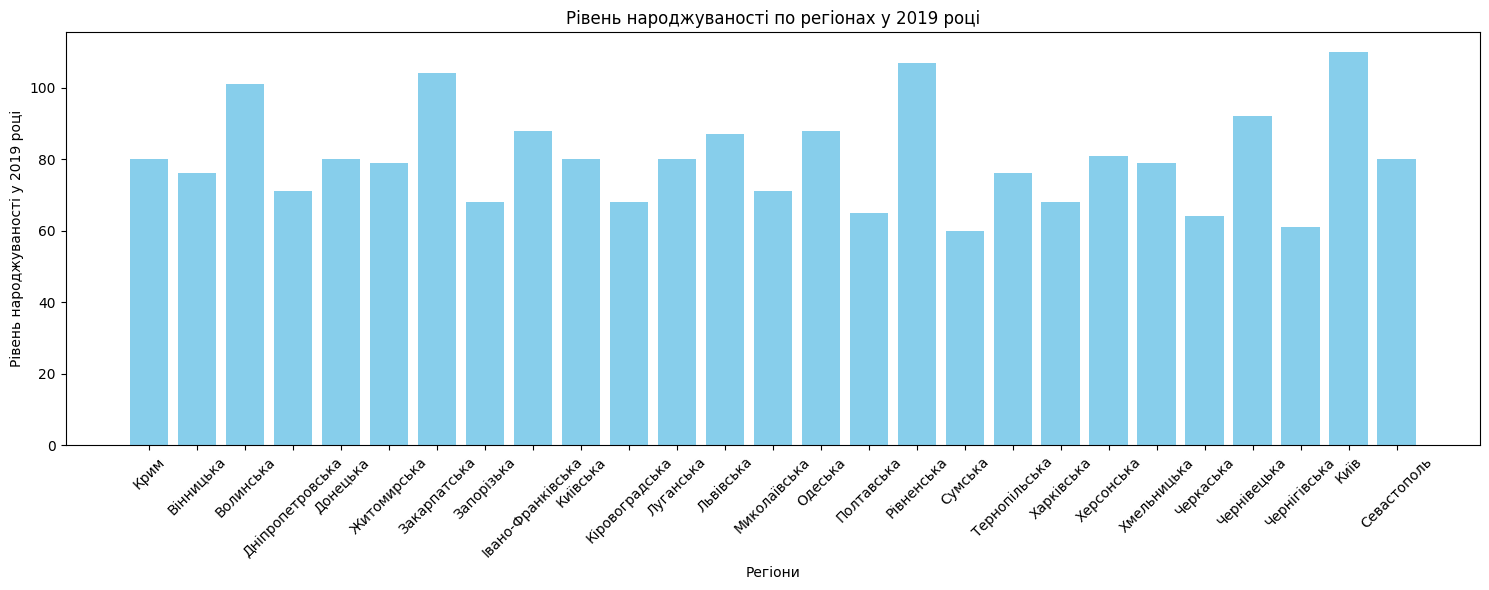

In [13]:
regions = df['Регіон']
birth_rates_2019 = df['2019']

plt.figure(figsize=(15, 6))
plt.bar(regions, birth_rates_2019, color='skyblue')
plt.xlabel('Регіони')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Рівень народжуваності по регіонах у 2019 році')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()